<a href="https://colab.research.google.com/github/withopenWaigua/TensforflowStudy/blob/main/Basic_classification_Classify_images_of_clothing_Noted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.7.0


In [4]:
import tensorflow.keras as keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()# 28*28的numpy矩阵，里面的数值是0-255

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] #分为这些类，然后标签是整数0-9

# 数据探索


In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape #1w测试

(10000, 28, 28)

In [12]:
len(test_labels)

10000

# 数据预处理

## 看图片数据，样式

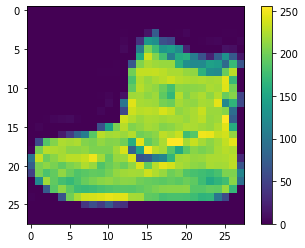

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() #展示色阶
plt.grid(False)
plt.show()

把数据标准化为[0-1]，对于把数据喂给神经网络很重要，训练集和测试集都要直接除以255.0

In [14]:
train_images = train_images/255.0

test_images = test_images/255.0

展示看效果

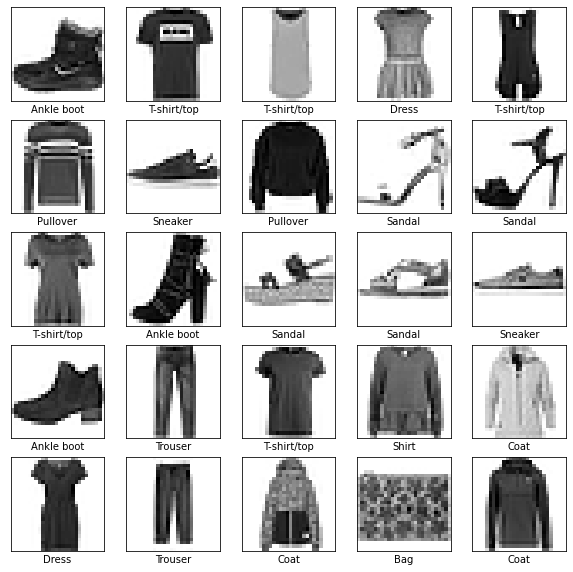

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) #i+1
  plt.xticks([]) #要设置xticks
  plt.yticks([]) #设置yticks
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [16]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #展平数据
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10)) #不加softmax

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
       loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['acc']
               )

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5010 - acc: 0.8234
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3784 - acc: 0.8636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3409 - acc: 0.8757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - acc: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - acc: 0.8901
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - acc: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - acc: 0.8993
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - acc: 0.9038
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2497 - acc: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2392 - acc: 0.9115


评估模型

In [25]:
history = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', history[1])

313/313 - 1s - loss: 0.3361 - acc: 0.8815 - 529ms/epoch - 2ms/step

Test accuracy: 0.8815000057220459


In [26]:
probability_model = keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)

In [28]:
predictions[0]

array([7.05329462e-10, 1.08174181e-11, 7.78525421e-12, 2.61070961e-12,
       1.14535124e-10, 1.29941138e-04, 1.61676161e-09, 9.36043356e-03,
       1.59611115e-08, 9.90509629e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

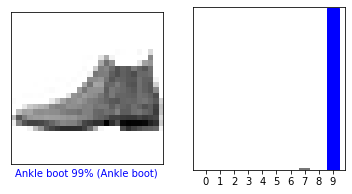

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

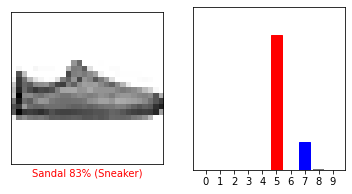

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

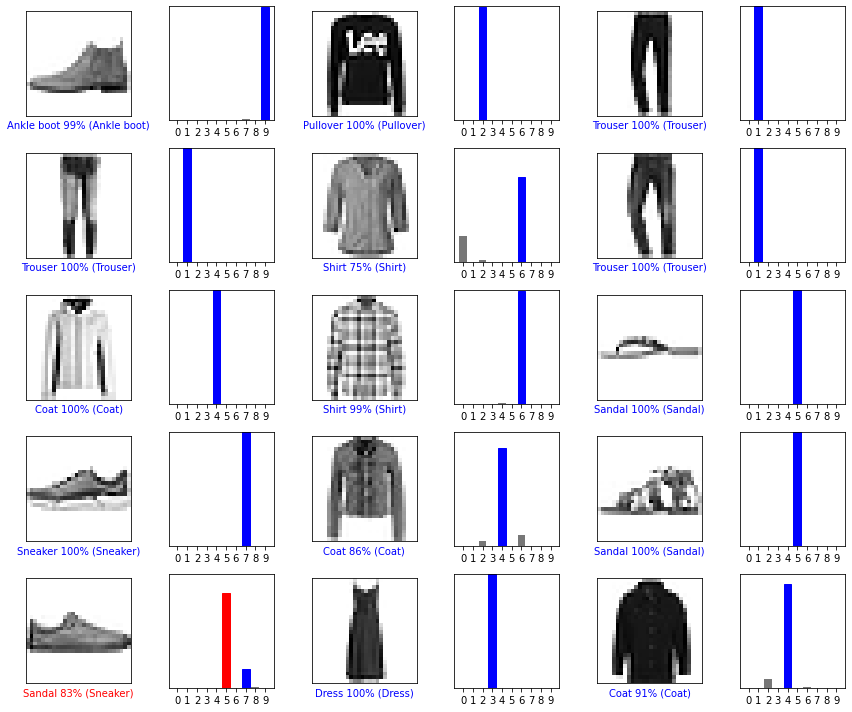

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [40]:
img = test_images[1]

print(img.shape)

(28, 28)


In [38]:
# keras预测要是一个batch，如果预测一张，就要把他变成列表[1,28,28]前面要有数量
# Add the image to a batch where it's the only member. 模型经过优化要对一批次一批次进行，即使只有一张也要把他变成一批次（1，28，28）而不是（28，28）

In [41]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.0485679e-05 5.0803376e-12 9.9860150e-01 9.3021814e-13 5.8265094e-04
  1.3720522e-15 7.4539898e-04 4.7834249e-20 2.2008378e-11 3.4889202e-15]]


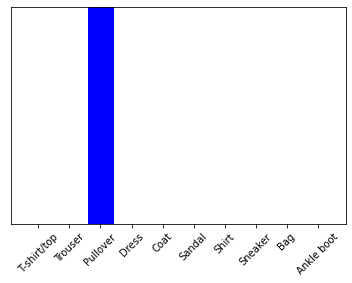

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [44]:
np.argmax(predictions_single[0])

2